In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')
path_data = '/content/gdrive/My Drive/Hackaviz2020/data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


### Load and analyze nuitees dataframe

In [4]:
df = pd.read_csv(path_data + 'nuitees.csv', error_bad_lines=False)
print(df.shape)
print(list(df.columns))

# get metrics on all variables
print(df.info())
df.head()

(365, 15)
['date', 'dpt_09', 'dpt_11', 'dpt_12', 'dpt_30', 'dpt_31', 'dpt_32', 'dpt_34', 'dpt_46', 'dpt_48', 'dpt_65', 'dpt_66', 'dpt_81', 'dpt_82', 'total_occitanie']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
date               365 non-null object
dpt_09             365 non-null int64
dpt_11             365 non-null int64
dpt_12             365 non-null int64
dpt_30             365 non-null int64
dpt_31             365 non-null int64
dpt_32             365 non-null int64
dpt_34             365 non-null int64
dpt_46             365 non-null int64
dpt_48             365 non-null int64
dpt_65             365 non-null int64
dpt_66             365 non-null int64
dpt_81             365 non-null int64
dpt_82             365 non-null int64
total_occitanie    365 non-null int64
dtypes: int64(14), object(1)
memory usage: 42.9+ KB
None


,date,dpt_09,dpt_11,dpt_12,dpt_30,dpt_31,dpt_32,dpt_34,dpt_46,dpt_48,dpt_65,dpt_66,dpt_81,dpt_82,total_occitanie
0,2018-01-01,36427,60093,33180,83708,161793,25691,166126,32670,15021,94459,152906,36720,29136,927930
1,2018-01-02,18132,33031,14487,42753,84032,12851,80693,14781,6257,33643,71513,18550,13421,444144
2,2018-01-03,14976,27231,13997,36904,75692,13027,73849,13041,5611,31812,81041,16327,11459,414967
3,2018-01-04,14176,25905,13108,34353,71062,10445,66395,11325,4830,29530,71453,15073,11412,379067
4,2018-01-05,11655,21763,11145,31649,69249,9284,63774,10504,4271,23467,52785,13890,10663,334099


In [5]:
df.describe()

,dpt_09,dpt_11,dpt_12,dpt_30,dpt_31,dpt_32,dpt_34,dpt_46,dpt_48,dpt_65,dpt_66,dpt_81,dpt_82,total_occitanie
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,12809.523288,44248.501370,21766.358904,58576.769863,78391.065753,15606.964384,136344.684932,21587.893151,9641.824658,30035.534247,87119.032877,17362.901370,16519.643836,5.500107e+05
std,8471.740421,29902.796034,15344.572105,33726.568006,21993.838813,9810.853935,86685.957233,16734.473364,7344.049099,17802.030940,64963.937821,9149.058283,7428.188032,3.168557e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,7192.000000,22268.000000,11089.000000,32914.000000,65346.000000,8723.000000,73504.000000,9775.000000,4174.000000,16688.000000,43922.000000,11270.000000,11288.000000,3.217680e+05
50%,10169.000000,36910.000000,17433.000000,50704.000000,76484.000000,13027.000000,116519.000000,16892.000000,8263.000000,27593.000000,65600.000000,15073.000000,15263.000000,4.617120e+05
75%,14890.000000,53581.000000,26522.000000,71167.000000,93139.000000,17892.000000,166126.000000,25517.000000,11919.000000,38164.000000,100942.000000,20689.000000,19651.000000,6.564510e+05
max,38392.000000,136945.000000,71531.000000,152483.000000,161793.000000,55238.000000,401637.000000,73458.000000,34037.000000,94459.000000,283421.000000,44735.000000,38910.000000,1.491112e+06


In [6]:
# check flist or nans
print(df.isna().any())

# get columns with nans 

# Show the number of missing rows for each feature with respect to the overall number of objects in dataframe
for col in df.columns:
    if df[col].value_counts().sum() != df.shape[0]:
        print('col: {}, {} / {}'.format(col, df[col].value_counts().sum(), df.shape[0])) 
        
# no nans in nuitees data

date               False
dpt_09             False
dpt_11             False
dpt_12             False
dpt_30             False
dpt_31             False
dpt_32             False
dpt_34             False
dpt_46             False
dpt_48             False
dpt_65             False
dpt_66             False
dpt_81             False
dpt_82             False
total_occitanie    False
dtype: bool


In [7]:
# check nb of unique features
for feature in df.columns:
    print('Number of unique values for {}: {}'.format(feature, len(df[feature].unique())))

Number of unique values for date: 365
Number of unique values for dpt_09: 362
Number of unique values for dpt_11: 363
Number of unique values for dpt_12: 362
Number of unique values for dpt_30: 363
Number of unique values for dpt_31: 364
Number of unique values for dpt_32: 360
Number of unique values for dpt_34: 364
Number of unique values for dpt_46: 359
Number of unique values for dpt_48: 359
Number of unique values for dpt_65: 363
Number of unique values for dpt_66: 363
Number of unique values for dpt_81: 360
Number of unique values for dpt_82: 360
Number of unique values for total_occitanie: 364


(365,) (365, 15)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


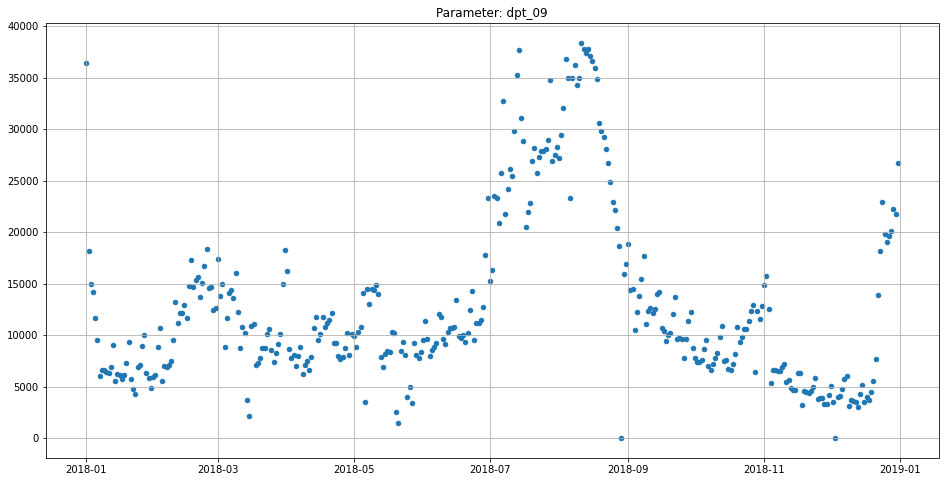

(365,) (365, 15)


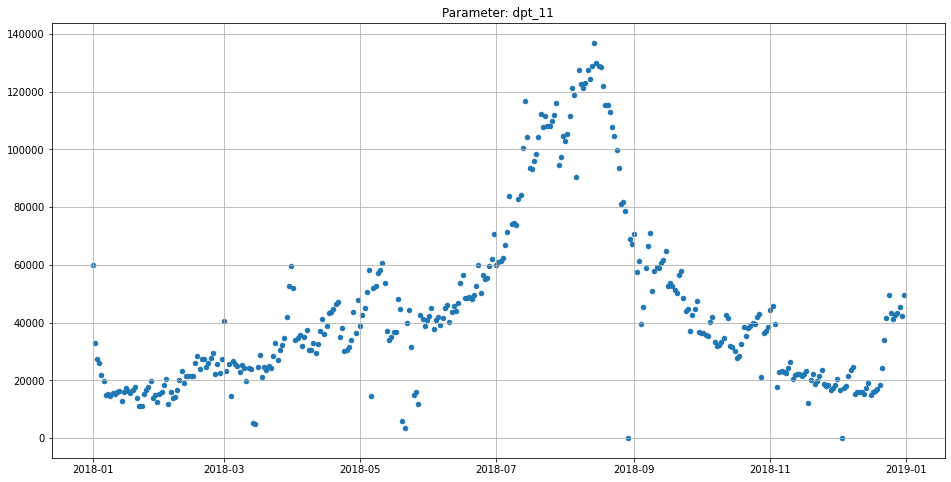

(365,) (365, 15)


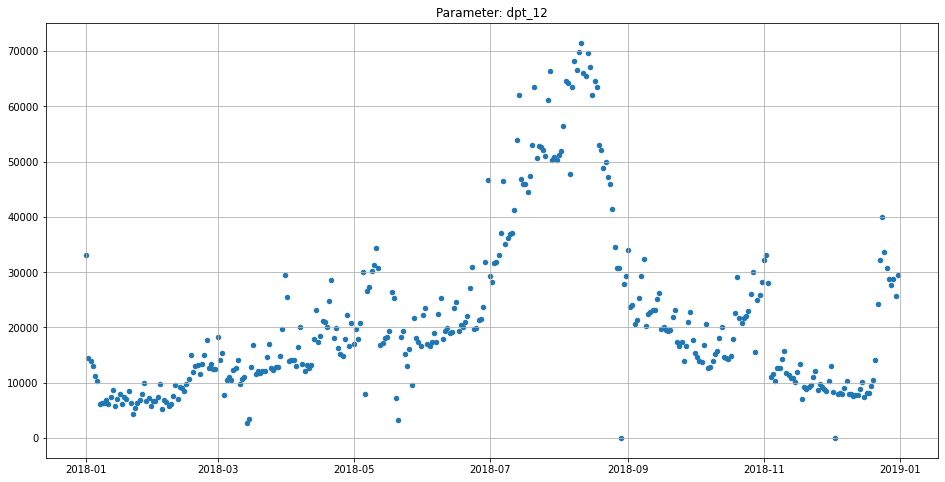

(365,) (365, 15)


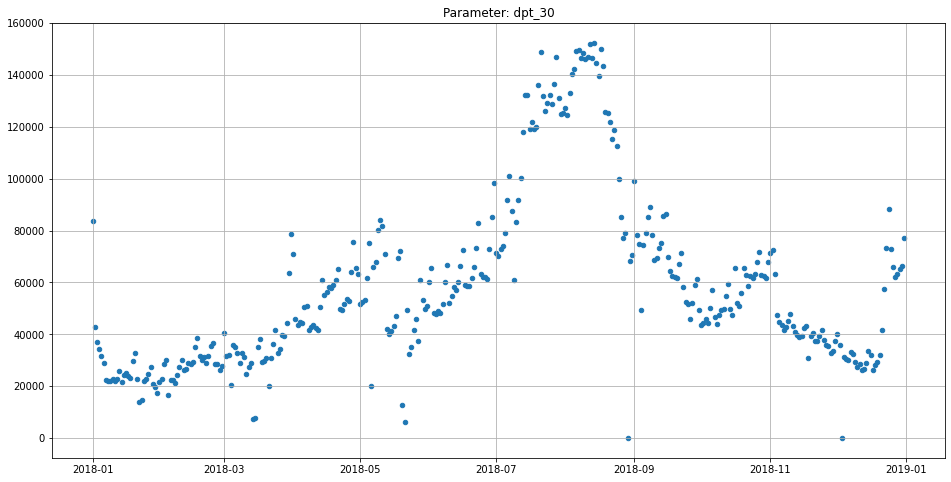

(365,) (365, 15)


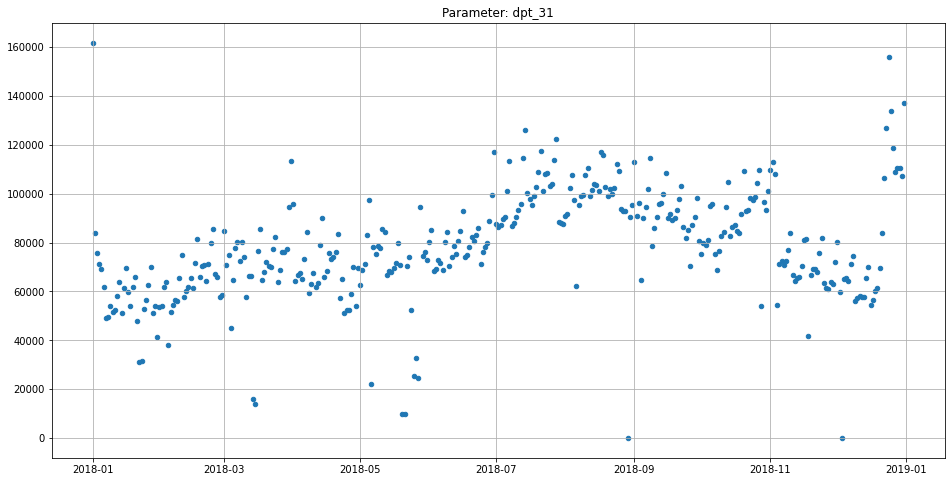

(365,) (365, 15)


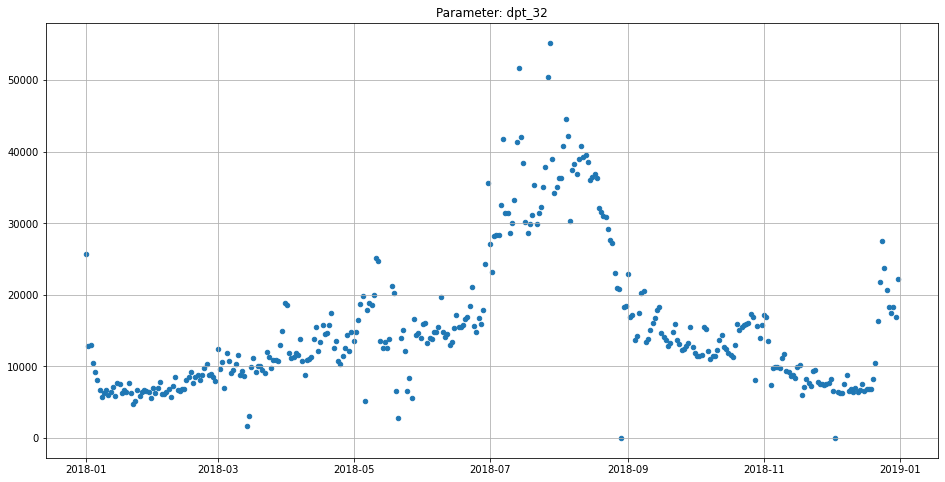

(365,) (365, 15)


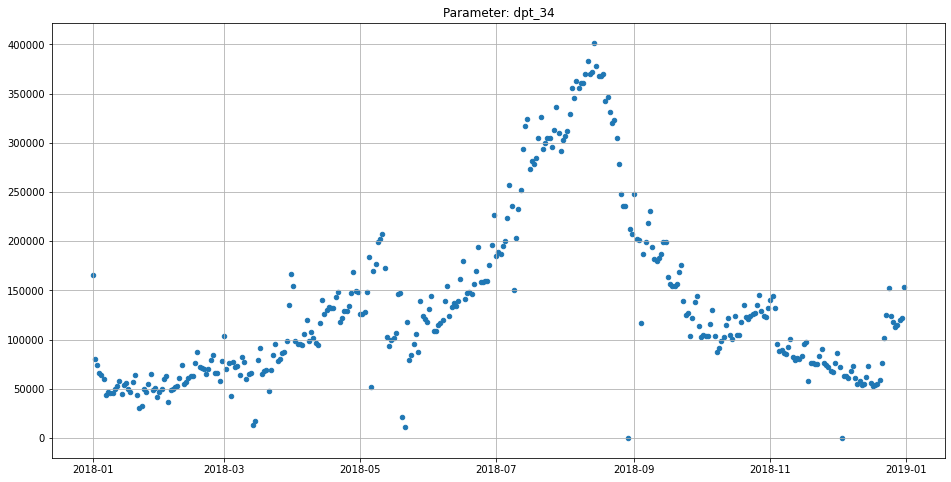

(365,) (365, 15)


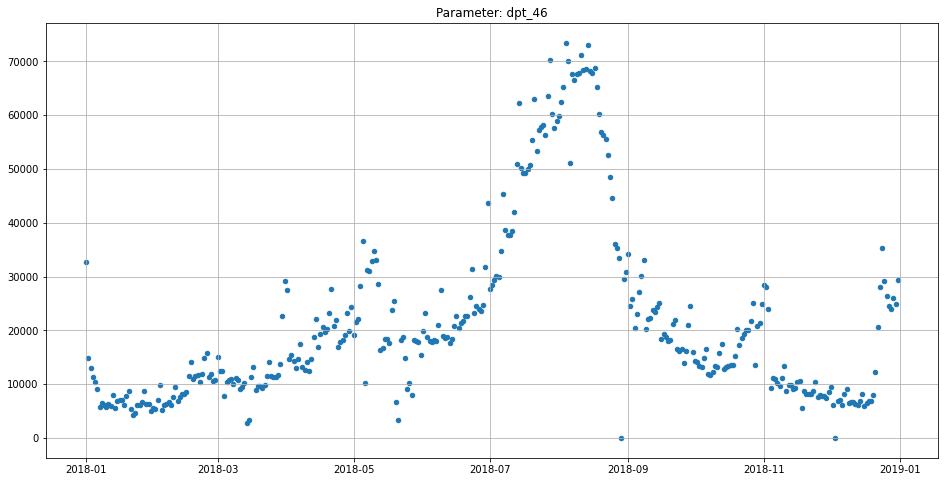

(365,) (365, 15)


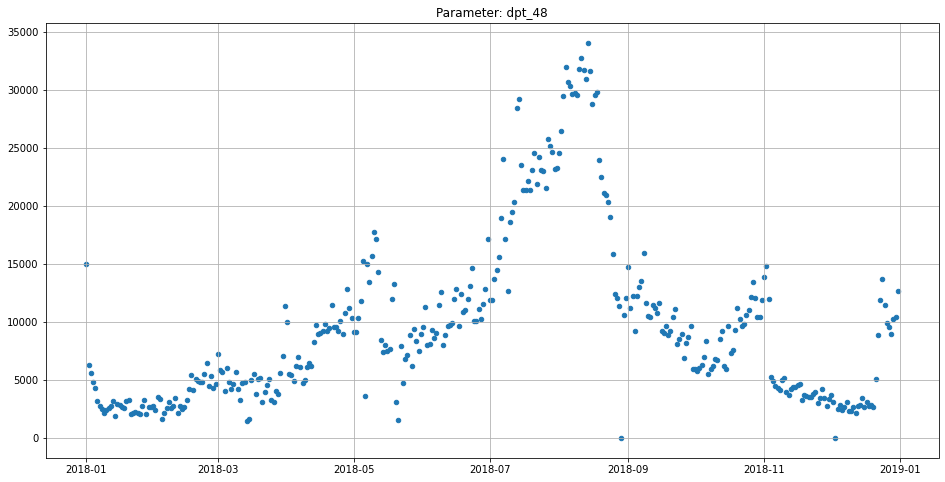

(365,) (365, 15)


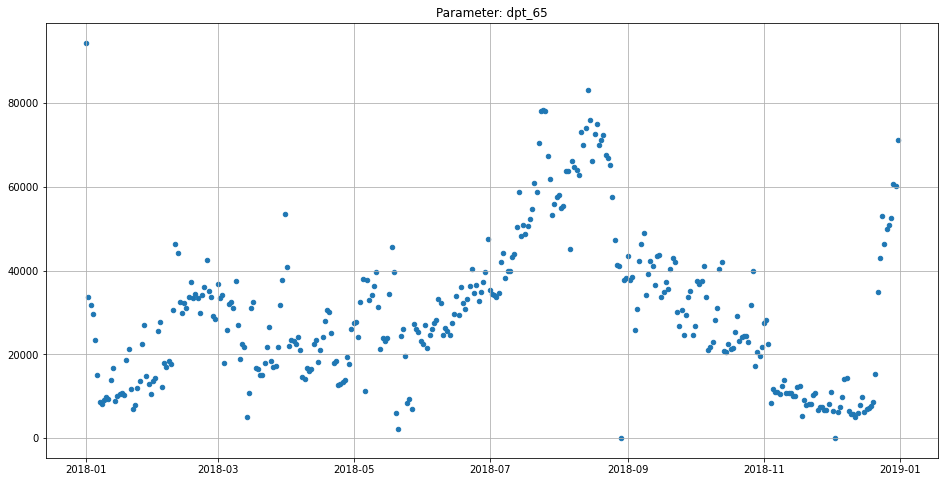

(365,) (365, 15)


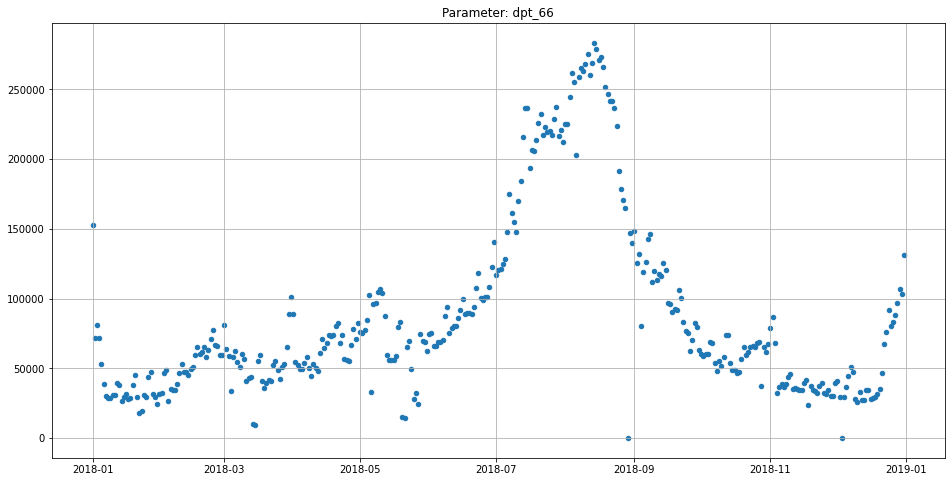

(365,) (365, 15)


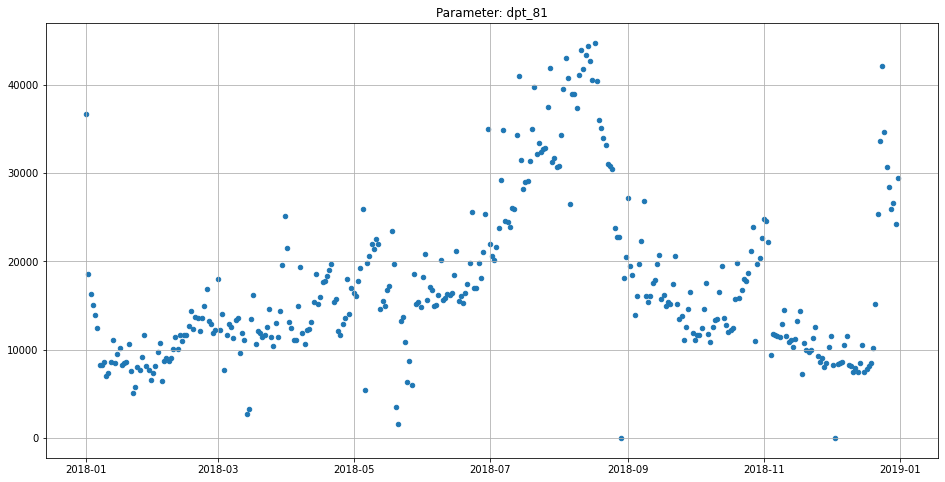

(365,) (365, 15)


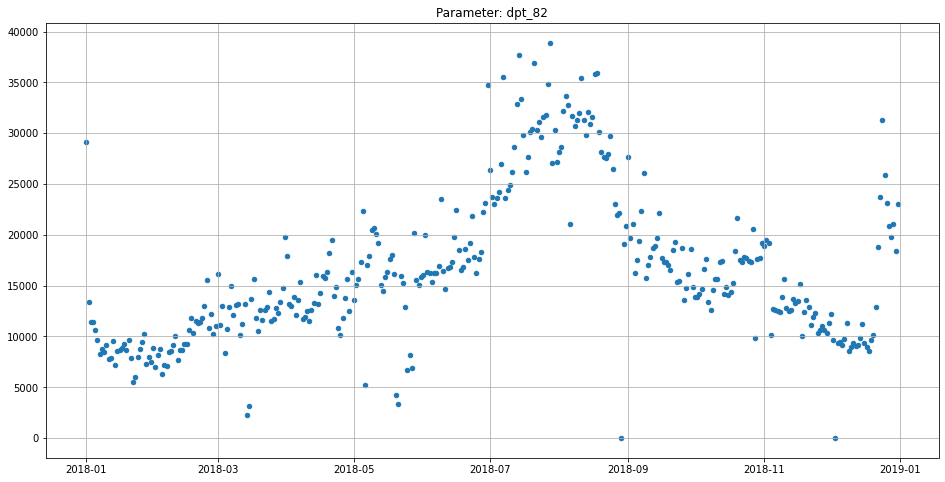

(365,) (365, 15)


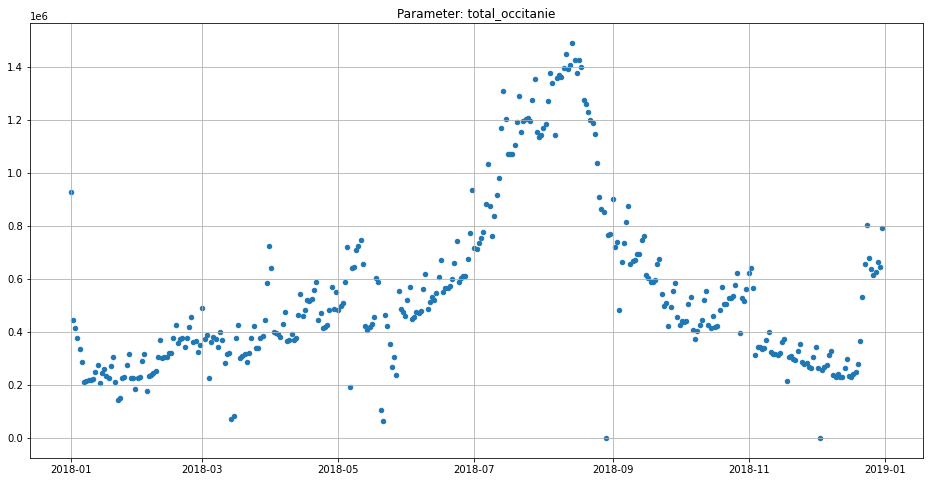

'\nfor each department we see a \n- high peak during August (2018-08) = summer holidays\n- lower peak in December = Christmas holidays\n- increase in deps up to August and descend up to December\n\nsome outliers are presented, but they are rare\n'

In [8]:
# convert date into datetime
df['date'] = pd.to_datetime(df['date'])

# visualize time series on each departement/ check for outliers
for feat_vis in df.columns[1:]:
    fig = plt.figure(figsize=(16,8))
    #df_vis = df[df['Inc'] == .copy(deep=True)
    x = np.linspace(0, df.shape[0], df.shape[0])
    print(x.shape, df.shape)
    plt.title('Parameter: {}'.format(feat_vis))
    plt.scatter(df['date'], df[feat_vis], s=20)
    plt.grid(True)
    plt.show()
    
'''
for each department we see a 
- high peak during August (2018-08) = summer holidays
- lower peak in December = Christmas holidays
- increase in deps up to August and descend up to December

some outliers are presented, but they are rare
'''

### Load and analyze par_origines dataframe

In [9]:
df_origin = pd.read_csv(path_data +  'par_origines.csv', error_bad_lines=False)
print(df_origin.shape)
print(list(df_origin.columns))

# get metrics on all variables
print(df_origin.info())
df_origin.head()

(493235, 8)
['date', 'org', 'dest', 'volume', 'vacances_org', 'Temp_midi', 'meteo', 'nb_evt']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493235 entries, 0 to 493234
Data columns (total 8 columns):
date            493235 non-null object
org             493235 non-null object
dest            493235 non-null int64
volume          493235 non-null int64
vacances_org    493235 non-null int64
Temp_midi       493235 non-null int64
meteo           493235 non-null int64
nb_evt          493235 non-null int64
dtypes: int64(6), object(2)
memory usage: 30.1+ MB
None


,date,org,dest,volume,vacances_org,Temp_midi,meteo,nb_evt
0,2018-01-01,01,9,169,1,12,0,0
1,2018-01-01,28,65,138,1,9,0,0
2,2018-01-01,29,65,629,1,9,0,0
3,2018-01-01,30,65,417,1,9,0,0
4,2018-01-01,32,65,459,1,9,0,0


In [10]:
# check flist or nans
print(df_origin.isna().any())

# get columns with nans 

# Show the number of missing rows for each feature with respect to the overall number of objects in dataframe
for col in df_origin.columns:
    if df_origin[col].value_counts().sum() != df_origin.shape[0]:
        print('col: {}, {} / {}'.format(col, df_origin[col].value_counts().sum(), df_origin.shape[0])) 
        
# no nans in par_origines data

date            False
org             False
dest            False
volume          False
vacances_org    False
Temp_midi       False
meteo           False
nb_evt          False
dtype: bool


In [11]:
# check nb of unique rows for each features
for feature in df_origin.columns:
    print('Number of unique values for {}: {}'.format(feature, len(df_origin[feature].unique())))

Number of unique values for date: 365
Number of unique values for org: 108
Number of unique values for dest: 13
Number of unique values for volume: 8639
Number of unique values for vacances_org: 3
Number of unique values for Temp_midi: 43
Number of unique values for meteo: 5
Number of unique values for nb_evt: 7


In [12]:
# make groupby and sum/ mean nuitee volume by destination departement
df_dest = pd.DataFrame(df_origin.groupby('dest')['volume'].sum().sort_values(ascending=False), columns=['volume'])
df_dest['prop'] = df_dest['volume'] / df_dest['volume'].sum()
print(df_dest, type(df_dest))
#df_dest['prop'] = df

'''
dep 34, 11, 66 are the most attrictive to tourists
these deps accumulate more than 50% of all nuitees of tourists
visualize on map
'''

# make groupby by origin
df_org = pd.DataFrame(df_origin.groupby('org')['volume'].sum().sort_values(ascending=False), columns=['volume'])
df_org['prop'] = df_org['volume'] / df_org['volume'].sum()
print(df_org, type(df_org))

'''
The most tourists coming from DE, GB, ES+PT, BE+LU
they accumulate 31 % of all nuitees of tourists
'''

        volume      prop
dest                    
34    49765810  0.247895
66    31798447  0.158395
31    28612739  0.142526
30    21380521  0.106501
11    16150703  0.080450
65    10962970  0.054609
12     7944721  0.039574
46     7879581  0.039250
81     6337459  0.031568
82     6029670  0.030035
32     5696542  0.028376
9      4675476  0.023290
48     3519266  0.017530 <class 'pandas.core.frame.DataFrame'>
          volume          prop
org                           
Autres  22228695  1.107261e-01
DE      12121476  6.037978e-02
GB      10523796  5.242138e-02
ES+PT   10294805  5.128072e-02
BE+LU    8339353  4.154018e-02
...          ...           ...
23        217227  1.082056e-03
90        187041  9.316930e-04
98         43226  2.153184e-04
97         37743  1.880063e-04
99           171  8.517892e-07

[108 rows x 2 columns] <class 'pandas.core.frame.DataFrame'>


'\nThe most tourists coming from DE, GB, ES+PT, BE+LU\nthey accumulate 31 % of all nuitees of tourists\n'

In [0]:
df_org.reset_index(inplace=True)

In [48]:
# process origin department indexes
def match(x):
  return re.match(r'^([\s\d]+)$', x)

# create bool column 
df_org['is_fr'] = df_org['org'].apply(match)
df_org['is_fr'] = df_org['is_fr'].isnull()
print(df_org['is_fr'])

# process department indexes
#print(df_org.index.unique())
#matches = [re.match(r'^([\s\d]+)$', string) for string in df_org.index.unique()]
#print(matches)
#df_org.index 

# encode bool column with etranger/ france
fr_dict = {True: 'Etranger', False: 'France'}
df_org['pays'] = df_org['is_fr'].map(fr_dict)

0       True
1       True
2       True
3       True
4       True
       ...  
103    False
104    False
105    False
106    False
107    False
Name: is_fr, Length: 108, dtype: bool


In [51]:
df_org.head()

,org,volume,prop,is_fr,pays
0,Autres,22228695,0.110726,True,Etranger
1,DE,12121476,0.060380,True,Etranger
2,GB,10523796,0.052421,True,Etranger
3,ES+PT,10294805,0.051281,True,Etranger
4,BE+LU,8339353,0.041540,True,Etranger


In [0]:
# create column month
df_origin['date'] = pd.to_datetime(df_origin['date'])
df_origin['month'] = list(map(lambda x: x.month, df_origin['date']))

In [58]:
'''
month with less vacations: 3, 5, 6
month with most vacations: 7, 8, 12
'''

# regarder repartition des vacanciers/ non vacanciers par mois
df_vacance = df_origin.groupby(['month', 'vacances_org'])['volume'].sum().reset_index()
df_month = df_origin.groupby(['month'])['volume'].sum().reset_index()

df_vacance = pd.merge(df_vacance, df_month, how='inner', on='month')
df_vacance['prop'] = df_vacance['volume_x'] / df_vacance['volume_y']
df_vacance



,month,vacances_org,volume_x,volume_y,prop
0,1,0,2841155,8561728,0.331844
1,1,1,1976636,8561728,0.230869
2,1,2,3743937,8561728,0.437288
3,2,0,2375264,9122917,0.260362
4,2,1,3245621,9122917,0.355766
5,2,2,3502032,9122917,0.383872
6,3,0,4934239,11124692,0.443539
7,3,1,1518211,11124692,0.136472
8,3,2,4672242,11124692,0.419988
9,4,0,3515358,13920650,0.252528


In [0]:
# encode month/ vacance_org with categorical variables
month_dict = {1: '01_Janvier', 2: '02_Febrier', 3: '03_Mars', 4: '04_Avril', 5: '05_Mai', 6: '06_Juin', 7: '07_Juillet', 8: '08_Aout', 9: '09_Septembre', 10: '10_Octobre', 11: '11_Novembre', 12: '12_Decembre'}
vacance_org_dict = {0: 'pas en vacances', 1: 'en vacances', 2: 'non renseigne'}

# map dicts with pandas series
df_vacance['month_enc'] = df_vacance['month'].map(month_dict)
df_vacance['vacances_org_enc'] = df_vacance['vacances_org'].map(vacance_org_dict)

In [60]:
df_vacance.head()

,month,vacances_org,volume_x,volume_y,prop,month_enc,vacances_org_enc
0,1,0,2841155,8561728,0.331844,01_Janvier,pas en vacances
1,1,1,1976636,8561728,0.230869,01_Janvier,en vacances
2,1,2,3743937,8561728,0.437288,01_Janvier,non renseigne
3,2,0,2375264,9122917,0.260362,02_Febrier,pas en vacances
4,2,1,3245621,9122917,0.355766,02_Febrier,en vacances


In [0]:
# write df_vacance/ df_org in csv
df_vacance.to_csv(path_data + 'df_vacance.csv')
df_org.to_csv(path_data + 'df_org.csv')

### Load and analyze capacite

In [18]:
df_cap = pd.read_csv(path_data + 'capacites.csv', error_bad_lines=False, encoding='latin-1')
print(df_cap.shape)
print(list(df_cap.columns))

# get metrics on all variables
print(df_cap.info())
df_cap.head()

(13, 61)
['dpt', 'nom_dpt', 'pop_dpt', 'Hbgt_collectif', 'Hbgt_locatif', 'Hbgt_plein_air', 'Hbgt_hotel', 'Hbgt_total', 'sem_01', 'sem_02', 'sem_03', 'sem_04', 'sem_05', 'sem_06', 'sem_07', 'sem_08', 'sem_09', 'sem_10', 'sem_11', 'sem_12', 'sem_13', 'sem_14', 'sem_15', 'sem_16', 'sem_17', 'sem_18', 'sem_19', 'sem_20', 'sem_21', 'sem_22', 'sem_23', 'sem_24', 'sem_25', 'sem_26', 'sem_27', 'sem_28', 'sem_29', 'sem_30', 'sem_31', 'sem_32', 'sem_33', 'sem_34', 'sem_35', 'sem_36', 'sem_37', 'sem_38', 'sem_39', 'sem_40', 'sem_41', 'sem_42', 'sem_43', 'sem_44', 'sem_45', 'sem_46', 'sem_47', 'sem_48', 'sem_49', 'sem_50', 'sem_51', 'sem_52', 'sem_53']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 61 columns):
dpt               13 non-null int64
nom_dpt           13 non-null object
pop_dpt           13 non-null int64
Hbgt_collectif    13 non-null int64
Hbgt_locatif      13 non-null int64
Hbgt_plein_air    13 non-null int64
Hbgt_hotel        13 non-null i

,dpt,nom_dpt,pop_dpt,Hbgt_collectif,Hbgt_locatif,Hbgt_plein_air,Hbgt_hotel,Hbgt_total,sem_01,sem_02,sem_03,sem_04,sem_05,sem_06,sem_07,sem_08,sem_09,sem_10,sem_11,sem_12,sem_13,sem_14,sem_15,sem_16,sem_17,sem_18,sem_19,sem_20,sem_21,sem_22,sem_23,sem_24,sem_25,sem_26,sem_27,sem_28,sem_29,sem_30,sem_31,sem_32,sem_33,sem_34,sem_35,sem_36,sem_37,sem_38,sem_39,sem_40,sem_41,sem_42,sem_43,sem_44,sem_45,sem_46,sem_47,sem_48,sem_49,sem_50,sem_51,sem_52,sem_53
0,9,Ariège,152611,187,2972,6337,1138,10634,110910,47498,46505,48364,47770,62444,95625,109423,94732,90601,55694,61748,84273,54462,61046,76684,59662,67512,92999,54932,39612,63897,67962,74882,75505,102877,164275,209592,174967,201714,216175,239860,250257,183709,105061,95277,88490,75287,69106,55364,58033,56364,74081,85266,45671,35678,32513,27064,27748,26779,57447,145398,26681
1,11,Aude,368323,11534,21106,35451,7662,75753,202467,105647,113437,105326,108781,123171,164384,185140,179483,169695,132567,185367,303394,239289,239745,299086,244297,297440,371463,241001,161692,288689,295010,338646,357691,419078,480826,636823,704844,759909,761730,836694,890552,715259,424581,393492,415587,370821,297438,259067,248312,224301,262367,259269,162776,144982,144316,125528,119881,114133,167276,308471,49482
2,12,Aveyron,278217,5651,18554,31042,9705,64952,102296,47342,50415,47535,48898,49486,74378,96619,93647,80766,68955,92362,127688,105131,109669,152124,123062,134422,197431,131935,94834,136799,136201,144888,161367,194223,243396,314057,351208,386723,389900,453454,445332,320074,176552,173268,162607,141010,126151,107758,110672,135110,159256,183413,89083,75752,68662,68237,51525,57458,106745,215260,29585
3,30,Gard,744958,11402,13392,66087,6912,97793,280736,159166,182171,145802,156956,173886,218946,222550,207674,221660,173915,221875,371400,321637,337188,407006,413382,377847,493359,325703,247816,388686,375733,428489,464569,513192,576698,719125,897245,931040,918445,1039018,1002642,778969,472345,531091,529065,447897,371733,332395,354415,400705,448325,446706,309218,275430,274291,250873,187164,203592,288989,484494,77267
4,31,Haute-Garonne,1376737,16248,10569,11284,10231,48332,572653,381328,420573,355608,366638,416787,467680,509484,457670,506628,389604,504431,601997,480610,491160,508383,403721,474832,545861,438047,289631,551943,517883,560147,556197,626729,655083,708130,722514,748704,665153,674099,745576,718988,575335,640973,667284,651855,593944,581205,595400,635742,655886,676377,514572,470522,493696,460842,396467,420665,564821,845424,137257


In [19]:
# check flist or nans
print(df_cap.isna().any().any())

# get columns with nans 

# Show the number of missing rows for each feature with respect to the overall number of objects in dataframe
for col in df_cap.columns:
    if df_cap[col].value_counts().sum() != df_cap.shape[0]:
        print('col: {}, {} / {}'.format(col, df_cap[col].value_counts().sum(), df_cap.shape[0])) 
        
# no nans in par_origines data

False


In [0]:
# encode months
df_cap['month_1'] = df_cap['sem_01'] + df_cap['sem_02'] + df_cap['sem_03'] + df_cap['sem_04'] + df_cap['sem_05']
df_cap['month_2'] = df_cap['sem_06'] + df_cap['sem_07'] + df_cap['sem_08'] + df_cap['sem_09']
df_cap['month_3'] = df_cap['sem_10'] + df_cap['sem_11'] + df_cap['sem_12'] + df_cap['sem_13']
df_cap['month_4'] = df_cap['sem_14'] + df_cap['sem_15'] + df_cap['sem_16'] + df_cap['sem_17'] + df_cap['sem_18']
df_cap['month_5'] = df_cap['sem_19'] + df_cap['sem_20'] + df_cap['sem_21'] + df_cap['sem_22']
df_cap['month_6'] = df_cap['sem_23'] + df_cap['sem_24'] + df_cap['sem_25'] + df_cap['sem_26']
df_cap['month_7'] = df_cap['sem_27'] + df_cap['sem_28'] + df_cap['sem_29'] + df_cap['sem_30'] + df_cap['sem_31']
df_cap['month_8'] = df_cap['sem_32'] + df_cap['sem_33'] + df_cap['sem_34'] + df_cap['sem_35']
df_cap['month_9'] = df_cap['sem_36'] + df_cap['sem_37'] + df_cap['sem_38'] + df_cap['sem_39']
df_cap['month_10'] = df_cap['sem_40'] + df_cap['sem_41'] + df_cap['sem_42'] + df_cap['sem_43'] + df_cap['sem_44']
df_cap['month_11'] = df_cap['sem_45'] + df_cap['sem_46'] + df_cap['sem_47'] + df_cap['sem_48']
df_cap['month_12'] = df_cap['sem_49'] + df_cap['sem_50'] + df_cap['sem_51'] + df_cap['sem_52'] + df_cap['sem_53']

In [21]:
'''
write table in csv and visualize on map
'''

for i in range(1,13):
    df_cap['prop_{}'.format(i)] = df_cap['month_{}'.format(i)] / (df_cap['Hbgt_total'] * 30) 

df_cap[['nom_dpt', 'prop_1', 'prop_2', 'prop_3', 'prop_4', 
        'prop_5', 'prop_6', 'prop_7', 'prop_8', 
        'prop_9', 'prop_10', 'prop_11', 'prop_12']]



,nom_dpt,prop_1,prop_2,prop_3,prop_4,prop_5,prop_6,prop_7,prop_8,prop_9,prop_10,prop_11,prop_12
0,Ariège,0.943662,1.135427,0.916294,1.001085,0.788164,1.006915,3.030290,2.441499,1.028650,1.031622,0.441747,0.890392
1,Aude,0.279706,0.286976,0.348071,0.580772,0.467680,0.620624,1.471507,1.261594,0.650068,0.551492,0.254160,0.334087
2,Aveyron,0.152156,0.161211,0.189766,0.320446,0.287904,0.326743,0.864887,0.716125,0.309478,0.357294,0.154850,0.236366
3,Gard,0.315234,0.280544,0.337055,0.632990,0.496138,0.607400,1.377929,1.122430,0.640736,0.675763,0.378286,0.423175
4,Haute-Garonne,1.446109,1.277015,1.381183,1.626739,1.258988,1.559323,2.413573,1.871774,1.761467,2.168756,1.337714,1.630827
5,Gers,0.298115,0.256356,0.328708,0.511419,0.455561,0.538466,1.389485,0.932657,0.468062,0.527784,0.270154,0.370073
6,Hérault,0.299336,0.288659,0.341933,0.664127,0.524945,0.658743,1.493017,1.330235,0.710226,0.628922,0.348692,0.360265
7,Lot,0.153367,0.158664,0.185646,0.368071,0.303742,0.357238,0.994138,0.812890,0.330756,0.329893,0.141504,0.221374
8,Lozère,0.144191,0.147137,0.169971,0.377948,0.335586,0.388116,0.980929,0.789282,0.359661,0.393576,0.138722,0.199625
9,Hautes-Pyrénées,0.246973,0.347292,0.274341,0.295784,0.275684,0.354901,0.732449,0.650273,0.399711,0.369432,0.105409,0.265190


### Merge df_cap with geojson (using geopandas)

In [22]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 931kB 4.8MB/s 
     |████████████████████████████████| 14.7MB 293kB/s 
     |████████████████████████████████| 10.4MB 12.0MB/s 


In [23]:
# read geo
geodf = gpd.read_file(path_data +  'capacites.geojson')
geodf.sort_values(by='nom_dpt', ascending=True, inplace=True)
geodf.head()

,INSEE_DEP,nom_dpt,pop_dpt,Hbgt_collectif,Hbgt_locatif,Hbgt_plein_air,Hbgt_hotel,Hbgt_total,sem_01,sem_02,sem_03,sem_04,sem_05,sem_06,sem_07,sem_08,sem_09,sem_10,sem_11,sem_12,sem_13,sem_14,sem_15,sem_16,sem_17,sem_18,sem_19,sem_20,sem_21,sem_22,sem_23,sem_24,sem_25,sem_26,sem_27,sem_28,sem_29,sem_30,sem_31,sem_32,sem_33,sem_34,sem_35,sem_36,sem_37,sem_38,sem_39,sem_40,sem_41,sem_42,sem_43,sem_44,sem_45,sem_46,sem_47,sem_48,sem_49,sem_50,sem_51,sem_52,sem_53,geometry
0,09,Ariège,152611,187,2972,6337,1138,10634,110910,47498,46505,48364,47770,62444,95625,109423,94732,90601,55694,61748,84273,54462,61046,76684,59662,67512,92999,54932,39612,63897,67962,74882,75505,102877,164275,209592,174967,201714,216175,239860,250257,183709,105061,95277,88490,75287,69106,55364,58033,56364,74081,85266,45671,35678,32513,27064,27748,26779,57447,145398,26681,"MULTIPOLYGON (((1.68800 43.27400, 1.72400 43.2..."
6,11,Aude,368323,11534,21106,35451,7662,75753,202467,105647,113437,105326,108781,123171,164384,185140,179483,169695,132567,185367,303394,239289,239745,299086,244297,297440,371463,241001,161692,288689,295010,338646,357691,419078,480826,636823,704844,759909,761730,836694,890552,715259,424581,393492,415587,370821,297438,259067,248312,224301,262367,259269,162776,144982,144316,125528,119881,114133,167276,308471,49482,"MULTIPOLYGON (((1.68800 43.27400, 1.75600 43.3..."
11,12,Aveyron,278217,5651,18554,31042,9705,64952,102296,47342,50415,47535,48898,49486,74378,96619,93647,80766,68955,92362,127688,105131,109669,152124,123062,134422,197431,131935,94834,136799,136201,144888,161367,194223,243396,314057,351208,386723,389900,453454,445332,320074,176552,173268,162607,141010,126151,107758,110672,135110,159256,183413,89083,75752,68662,68237,51525,57458,106745,215260,29585,"MULTIPOLYGON (((2.98200 44.64500, 3.08400 44.5..."
5,30,Gard,744958,11402,13392,66087,6912,97793,280736,159166,182171,145802,156956,173886,218946,222550,207674,221660,173915,221875,371400,321637,337188,407006,413382,377847,493359,325703,247816,388686,375733,428489,464569,513192,576698,719125,897245,931040,918445,1039018,1002642,778969,472345,531091,529065,447897,371733,332395,354415,400705,448325,446706,309218,275430,274291,250873,187164,203592,288989,484494,77267,"MULTIPOLYGON (((3.99800 44.46000, 4.06800 44.4..."
8,32,Gers,189824,4288,11151,11943,2536,29918,86137,44195,48665,42289,46284,47786,53930,63315,65059,72000,53142,71829,98058,82436,83531,104255,85266,103531,138763,100361,64735,105025,107502,103297,119942,152554,214168,258395,223558,281494,269503,261964,255989,200760,118384,116777,112731,98422,92174,89240,87200,91365,105552,100350,71643,61139,57082,52610,41824,47743,77563,142863,22162,"MULTIPOLYGON (((0.07600 43.98300, 0.16600 43.9..."


In [24]:
# merge df_cap and geodf columns
features = ['prop_1', 'prop_2', 'prop_3', 'prop_4', 'prop_5', 'prop_6', 'prop_7', 'prop_8', 'prop_9', 'prop_10', 'prop_11', 'prop_12']
for feature in features:
  geodf[feature] = df_cap[feature]
geodf.head()

,INSEE_DEP,nom_dpt,pop_dpt,Hbgt_collectif,Hbgt_locatif,Hbgt_plein_air,Hbgt_hotel,Hbgt_total,sem_01,sem_02,sem_03,sem_04,sem_05,sem_06,sem_07,sem_08,sem_09,sem_10,sem_11,sem_12,sem_13,sem_14,sem_15,sem_16,sem_17,sem_18,sem_19,sem_20,sem_21,sem_22,sem_23,sem_24,sem_25,sem_26,sem_27,sem_28,sem_29,sem_30,sem_31,sem_32,sem_33,sem_34,sem_35,sem_36,sem_37,sem_38,sem_39,sem_40,sem_41,sem_42,sem_43,sem_44,sem_45,sem_46,sem_47,sem_48,sem_49,sem_50,sem_51,sem_52,sem_53,geometry,prop_1,prop_2,prop_3,prop_4,prop_5,prop_6,prop_7,prop_8,prop_9,prop_10,prop_11,prop_12
0,09,Ariège,152611,187,2972,6337,1138,10634,110910,47498,46505,48364,47770,62444,95625,109423,94732,90601,55694,61748,84273,54462,61046,76684,59662,67512,92999,54932,39612,63897,67962,74882,75505,102877,164275,209592,174967,201714,216175,239860,250257,183709,105061,95277,88490,75287,69106,55364,58033,56364,74081,85266,45671,35678,32513,27064,27748,26779,57447,145398,26681,"MULTIPOLYGON (((1.68800 43.27400, 1.72400 43.2...",0.943662,1.135427,0.916294,1.001085,0.788164,1.006915,3.030290,2.441499,1.028650,1.031622,0.441747,0.890392
6,11,Aude,368323,11534,21106,35451,7662,75753,202467,105647,113437,105326,108781,123171,164384,185140,179483,169695,132567,185367,303394,239289,239745,299086,244297,297440,371463,241001,161692,288689,295010,338646,357691,419078,480826,636823,704844,759909,761730,836694,890552,715259,424581,393492,415587,370821,297438,259067,248312,224301,262367,259269,162776,144982,144316,125528,119881,114133,167276,308471,49482,"MULTIPOLYGON (((1.68800 43.27400, 1.75600 43.3...",0.299336,0.288659,0.341933,0.664127,0.524945,0.658743,1.493017,1.330235,0.710226,0.628922,0.348692,0.360265
11,12,Aveyron,278217,5651,18554,31042,9705,64952,102296,47342,50415,47535,48898,49486,74378,96619,93647,80766,68955,92362,127688,105131,109669,152124,123062,134422,197431,131935,94834,136799,136201,144888,161367,194223,243396,314057,351208,386723,389900,453454,445332,320074,176552,173268,162607,141010,126151,107758,110672,135110,159256,183413,89083,75752,68662,68237,51525,57458,106745,215260,29585,"MULTIPOLYGON (((2.98200 44.64500, 3.08400 44.5...",0.498202,0.474765,0.497037,0.743000,0.605485,0.729327,1.536249,1.271573,0.650682,0.786250,0.421466,0.648925
5,30,Gard,744958,11402,13392,66087,6912,97793,280736,159166,182171,145802,156956,173886,218946,222550,207674,221660,173915,221875,371400,321637,337188,407006,413382,377847,493359,325703,247816,388686,375733,428489,464569,513192,576698,719125,897245,931040,918445,1039018,1002642,778969,472345,531091,529065,447897,371733,332395,354415,400705,448325,446706,309218,275430,274291,250873,187164,203592,288989,484494,77267,"MULTIPOLYGON (((3.99800 44.46000, 4.06800 44.4...",0.298115,0.256356,0.328708,0.511419,0.455561,0.538466,1.389485,0.932657,0.468062,0.527784,0.270154,0.370073
8,32,Gers,189824,4288,11151,11943,2536,29918,86137,44195,48665,42289,46284,47786,53930,63315,65059,72000,53142,71829,98058,82436,83531,104255,85266,103531,138763,100361,64735,105025,107502,103297,119942,152554,214168,258395,223558,281494,269503,261964,255989,200760,118384,116777,112731,98422,92174,89240,87200,91365,105552,100350,71643,61139,57082,52610,41824,47743,77563,142863,22162,"MULTIPOLYGON (((0.07600 43.98300, 0.16600 43.9...",0.144191,0.147137,0.169971,0.377948,0.335586,0.388116,0.980929,0.789282,0.359661,0.393576,0.138722,0.199625


In [0]:
# write geodf into file
geodf.to_file(path_data + 'df_cap_month.geojson', driver='GeoJSON')

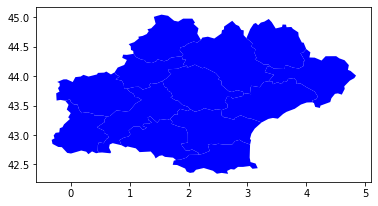

In [26]:
# plot geodf
ax = geodf.plot(color='blue')